**Instructions :**

Using the Mental Health dataset and what you have learn this week, answer the following questions :

What is the distribution of mental health conditions among different age groups in the tech industry?

How does the frequency of mental health issues vary by gender?

Identify the countries with the highest and lowest reported rates of mental health issues in the tech industry.

**Ressources**

Use the Mental Health in Tech Survey dataset available on Kaggle.

**Hint**

Introduction to the Dataset:

Download the dataset from Kaggle.

Load the dataset using Pandas.

Perform initial exploration to understand the dataset structure : whats the distribution of the data? What types of data do i have?

Data Cleaning:

Identify and handle missing values.

Detect and correct any inconsistencies in the data.

Drop irrelevant columns if necessary.

**Loading the Dataset**

In [1]:
# Uploading the files
from google.colab import files

uploaded = files.upload()

Saving survey.csv to survey.csv


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("survey.csv")

# View first few rows
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


**Initial Exploration**

In [3]:
# Summary of the dataset
df.info()

# Basic statistics
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1.259000e+03,1259,1259,744,1241,1259,1259,995,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,NaN,49,48,45,2,2,2,4,6,...,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 12:31:41,NaN,Male,United States,CA,No,No,Yes,Sometimes,6-25,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,NaN,615,751,138,1095,767,637,465,290,...,563,490,925,774,516,1008,557,576,1075,5
mean,NaN,7.942815e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.818299e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,-1.726000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.700000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.100000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isnull().mean().sort_values(ascending=False)

,0
comments,0.869738
state,0.409055
work_interfere,0.209690
self_employed,0.014297
Gender,0.000000
Timestamp,0.000000
Age,0.000000
family_history,0.000000
treatment,0.000000
no_employees,0.000000


**Data Cleaning**

In [5]:
# 1. Drop irrelevant columns
irrelevant_columns = ['Timestamp', 'comments', 'state', 'self_employed']
df = df.drop(columns=[col for col in irrelevant_columns if col in df.columns])

# 2. Impute Age
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

# Filter unrealistic ages
df = df[(df['Age'] >= 18) & (df['Age'] <= 70)]

# 3. Impute and clean Gender
df['Gender'] = df['Gender'].fillna('Unknown')

def clean_gender(gender):
    gender = gender.lower()
    if "female" in gender:
        return "Female"
    elif "male" in gender:
        return "Male"
    else:
        return "Other"

df['Gender'] = df['Gender'].apply(clean_gender)

# 4. Impute Country
df['Country'] = df['Country'].fillna('Unknown')

# 5. Impute mental_health_consequence
df['mental_health_consequence'] = df['mental_health_consequence'].fillna('Unknown')

# 6. Check remaining missing values
print(df.isnull().sum())

Age                            0
Gender                         0
Country                        0
family_history                 0
treatment                      0
work_interfere               262
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64


In [6]:
print(df['work_interfere'].value_counts(dropna=False))

work_interfere
Sometimes    464
NaN          262
Never        211
Rarely       173
Often        140
Name: count, dtype: int64


In [7]:
# Impute missing work_interfere values with mode
df['work_interfere'] = df['work_interfere'].fillna('Sometimes')

# Confirming that all the missing values are now handled
print(df.isnull().sum().sort_values(ascending=False))

Age                          0
Gender                       0
Country                      0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64


**Distribution by Age Group**

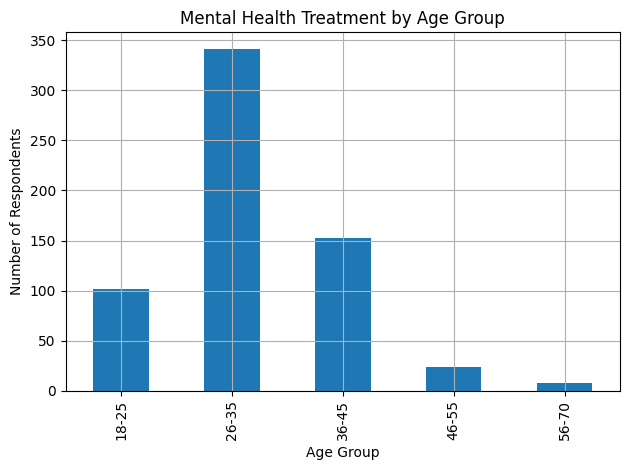

In [8]:
# Creating age bins
df['Age_Group'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 70],
                         labels=['18-25', '26-35', '36-45', '46-55', '56-70'])

# Counting mental health treatment per age group
age_dist = df[df['treatment']=='Yes']['Age_Group'].value_counts().sort_index()

import matplotlib.pyplot as plt

age_dist.plot(kind='bar', title='Mental Health Treatment by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.tight_layout()
plt.show()

The 26–35 age group represents the largest share of mental health treatment cases — possibly due to mid-career pressures, high workloads, or growing awareness of mental health support.

Treatment rates drop significantly in older age groups (46+), which could reflect underreporting, stigma, or reduced participation in tech roles at those ages.

The 18–25 age group still has a notable number of treatment cases, possibly tied to entry-level job stress or transitioning from school to work.

**Frequency by Gender**

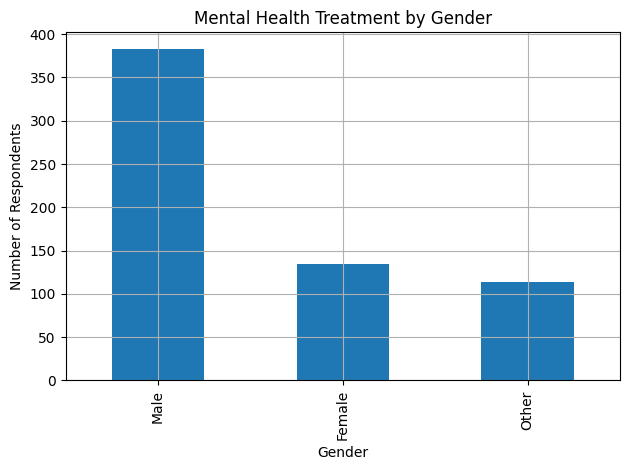

In [9]:
gender_dist = df[df['treatment'] == 'Yes']['Gender'].value_counts()

gender_dist.plot(kind='bar', title='Mental Health Treatment by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Respondents')
plt.grid(True)
plt.tight_layout()
plt.show()

Males represent the highest number of reported treatment cases — but this may reflect their higher representation in the tech industry overall, rather than a higher rate of mental health issues.

Females report fewer treatment cases, though this may also be affected by gender imbalances in tech workforce participation.

The "Other" category (including nonbinary, genderqueer, etc.) reports a notably high number relative to group size, which may indicate increased vulnerability to mental health challenges or greater willingness to seek help and disclose.

**Highest and Lowest Mental Health Rates by Country**

In [12]:
# Counting total responses per country
country_counts = df['Country'].value_counts()

# Filtering countries with at least 10 responses
valid_countries = country_counts[country_counts >= 10].index
filtered_country_treatment = country_treatment.loc[valid_countries]

# Re-sorting
filtered_sorted = filtered_country_treatment.sort_values(by='Yes', ascending=False)

# Getting top and bottom 5
top_countries_filtered = filtered_sorted['Yes'].head(5)
bottom_countries_filtered = filtered_sorted['Yes'].tail(5)

print("Top 5 Countries with the Highest Treatment Rates (min 10 responses):")
print(top_countries_filtered)

print("\nBottom 5 Countries with the Lowest Treatment Rates (min 10 responses):")
print(bottom_countries_filtered)

Top 5 Countries with the Highest Treatment Rates (min 10 responses):
Country
Australia         0.619048
United States     0.546309
Canada            0.513889
United Kingdom    0.500000
Ireland           0.481481
Name: Yes, dtype: float64

Bottom 5 Countries with the Lowest Treatment Rates (min 10 responses):
Country
Ireland        0.481481
Germany        0.466667
Netherlands    0.333333
India          0.300000
France         0.153846
Name: Yes, dtype: float64


Countries like Australia, the United States, and Canada show higher treatment rates, possibly reflecting greater awareness and access to mental health services.

Countries like France and India have lower reported treatment rates, which may be influenced by cultural stigma, limited access to services, or underreporting.

Ireland appears in both lists due to its treatment rate being at the threshold between the top and bottom five.